In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense

# Data preprocessing

In [2]:
data = pd.read_csv("MODEL_DATA_final.csv",sep=";", decimal='.')
data.head()

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,CPL_meV,CPL_cm-1
0,ND3X0.0,-0.0004,-0.0002,3.0,0,0.0066,6.6,53.232564
1,ND3X0.2,-0.0004,0.5391,3.0,0,0.0063,6.3,50.812902
2,ND3X0.4,-0.0004,1.0784,3.0,0,0.0057,5.7,45.973578
3,ND3X0.6,-0.0004,1.6178,3.0,0,0.0049,4.9,39.521146
4,ND3X0.8,-0.0004,2.1571,3.0,0,0.0041,4.1,33.068714


In [3]:
data.shape

(10584, 8)

In [5]:
X = data[["Xshift","Yshift","Zshift","alpha_deg"]].values
Y = data["CPL"].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.astype(float) ,Y, test_size=0.2)

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [8]:
type(y_train[0])

numpy.float64

In [9]:
X_train.shape[1]

4

# Neural Netowork

In [10]:
model = Sequential()
model.add(Dense(512, input_shape=(4,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [11]:
model.compile(loss='mse', optimizer='adam')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-trai

In [15]:
num_epochs = 1000

In [16]:
#callback = EarlyStopping(monitor="val_loss", patience=100, verbose=1)

In [17]:
%%time
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1)

Epoch 1/1000
239/239 [==============================] - 1s 3ms/step - loss: 7.9231e-05 - val_loss: 2.0254e-06
Epoch 2/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.5931e-06 - val_loss: 2.3479e-06
Epoch 3/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.9033e-06 - val_loss: 1.4241e-06
Epoch 4/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.0123e-06 - val_loss: 1.4726e-06
Epoch 5/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.8207e-06 - val_loss: 2.9605e-06
Epoch 6/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.9303e-06 - val_loss: 1.3112e-06
Epoch 7/1000
239/239 [==============================] - 1s 2ms/step - loss: 1.6055e-06 - val_loss: 1.4996e-06
Epoch 8/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.5420e-06 - val_loss: 1.3294e-06
Epoch 9/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.4468e-06 - val_loss: 1.3845e-06
Epoch 10/1

Epoch 75/1000
239/239 [==============================] - 1s 2ms/step - loss: 7.8728e-07 - val_loss: 6.8712e-07
Epoch 76/1000
239/239 [==============================] - 1s 2ms/step - loss: 8.2659e-07 - val_loss: 2.2849e-06
Epoch 77/1000
239/239 [==============================] - 1s 2ms/step - loss: 8.6528e-07 - val_loss: 8.6804e-07
Epoch 78/1000
239/239 [==============================] - 1s 3ms/step - loss: 8.0901e-07 - val_loss: 6.6053e-07
Epoch 79/1000
239/239 [==============================] - 1s 2ms/step - loss: 7.9293e-07 - val_loss: 6.8630e-07
Epoch 80/1000
239/239 [==============================] - 1s 3ms/step - loss: 7.7251e-07 - val_loss: 6.7721e-07
Epoch 81/1000
239/239 [==============================] - 1s 3ms/step - loss: 7.8166e-07 - val_loss: 7.7547e-07
Epoch 82/1000
239/239 [==============================] - 1s 2ms/step - loss: 7.8055e-07 - val_loss: 5.8935e-07
Epoch 83/1000
239/239 [==============================] - 1s 2ms/step - loss: 7.2606e-07 - val_loss: 9.4262e-07
E

239/239 [==============================] - 1s 3ms/step - loss: 4.1782e-07 - val_loss: 4.9380e-07
Epoch 149/1000
239/239 [==============================] - 1s 3ms/step - loss: 4.2658e-07 - val_loss: 3.6269e-07
Epoch 150/1000
239/239 [==============================] - 1s 2ms/step - loss: 3.1829e-07 - val_loss: 9.8942e-07
Epoch 151/1000
239/239 [==============================] - 1s 2ms/step - loss: 4.5479e-07 - val_loss: 2.6887e-07
Epoch 152/1000
239/239 [==============================] - 1s 2ms/step - loss: 4.5044e-07 - val_loss: 5.1147e-07
Epoch 153/1000
239/239 [==============================] - 1s 2ms/step - loss: 5.3504e-07 - val_loss: 3.0580e-07
Epoch 154/1000
239/239 [==============================] - 1s 2ms/step - loss: 4.5536e-07 - val_loss: 2.3601e-07
Epoch 155/1000
239/239 [==============================] - 1s 2ms/step - loss: 3.7632e-07 - val_loss: 5.2870e-07
Epoch 156/1000
239/239 [==============================] - 1s 2ms/step - loss: 3.1199e-07 - val_loss: 1.7884e-07
Epoch 1

239/239 [==============================] - 1s 3ms/step - loss: 3.7334e-07 - val_loss: 1.7639e-07
Epoch 222/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.4078e-07 - val_loss: 1.6976e-07
Epoch 223/1000
239/239 [==============================] - 1s 3ms/step - loss: 3.2400e-07 - val_loss: 7.9897e-08
Epoch 224/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.6657e-07 - val_loss: 7.4483e-08
Epoch 225/1000
239/239 [==============================] - 1s 3ms/step - loss: 7.9709e-08 - val_loss: 3.4352e-07
Epoch 226/1000
239/239 [==============================] - 1s 2ms/step - loss: 1.0012e-07 - val_loss: 1.4190e-07
Epoch 227/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.0759e-07 - val_loss: 2.8493e-07
Epoch 228/1000
239/239 [==============================] - 1s 2ms/step - loss: 2.8815e-07 - val_loss: 2.7575e-07
Epoch 229/1000
239/239 [==============================] - 1s 2ms/step - loss: 1.3093e-07 - val_loss: 4.0486e-08
Epoch 2

239/239 [==============================] - 1s 4ms/step - loss: 8.2434e-07 - val_loss: 6.3631e-07
Epoch 295/1000
239/239 [==============================] - 1s 4ms/step - loss: 7.0311e-07 - val_loss: 6.7930e-07
Epoch 296/1000
239/239 [==============================] - 1s 4ms/step - loss: 6.2691e-07 - val_loss: 5.0334e-07
Epoch 297/1000
239/239 [==============================] - 1s 3ms/step - loss: 5.6192e-07 - val_loss: 4.6968e-07
Epoch 298/1000
239/239 [==============================] - 1s 3ms/step - loss: 3.5643e-07 - val_loss: 1.5086e-07
Epoch 299/1000
239/239 [==============================] - 1s 4ms/step - loss: 2.3114e-07 - val_loss: 2.4399e-07
Epoch 300/1000
239/239 [==============================] - 1s 5ms/step - loss: 2.8959e-07 - val_loss: 5.6686e-07
Epoch 301/1000
239/239 [==============================] - 1s 4ms/step - loss: 4.6954e-07 - val_loss: 1.9764e-07
Epoch 302/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.3256e-07 - val_loss: 1.4730e-07
Epoch 3

239/239 [==============================] - 1s 3ms/step - loss: 1.7057e-07 - val_loss: 1.6867e-07
Epoch 368/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.3266e-07 - val_loss: 7.3855e-08
Epoch 369/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.4255e-07 - val_loss: 9.4975e-08
Epoch 370/1000
239/239 [==============================] - 1s 3ms/step - loss: 9.3651e-08 - val_loss: 5.0542e-08
Epoch 371/1000
239/239 [==============================] - 1s 3ms/step - loss: 7.2614e-08 - val_loss: 6.6101e-08
Epoch 372/1000
239/239 [==============================] - 1s 3ms/step - loss: 8.5374e-08 - val_loss: 1.1118e-07
Epoch 373/1000
239/239 [==============================] - 1s 3ms/step - loss: 4.1218e-07 - val_loss: 1.4736e-07
Epoch 374/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.0553e-07 - val_loss: 1.3655e-07
Epoch 375/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.0067e-07 - val_loss: 4.9114e-08
Epoch 3

239/239 [==============================] - 1s 3ms/step - loss: 1.1471e-07 - val_loss: 5.6812e-08
Epoch 441/1000
239/239 [==============================] - 1s 3ms/step - loss: 6.0133e-08 - val_loss: 4.7216e-08
Epoch 442/1000
239/239 [==============================] - 1s 3ms/step - loss: 4.0982e-08 - val_loss: 4.5943e-08
Epoch 443/1000
239/239 [==============================] - 1s 3ms/step - loss: 4.0819e-08 - val_loss: 4.1757e-08
Epoch 444/1000
239/239 [==============================] - 1s 3ms/step - loss: 4.0428e-08 - val_loss: 8.5779e-08
Epoch 445/1000
239/239 [==============================] - 1s 3ms/step - loss: 4.2834e-08 - val_loss: 4.6303e-07
Epoch 446/1000
239/239 [==============================] - 1s 3ms/step - loss: 7.2779e-08 - val_loss: 3.0316e-08
Epoch 447/1000
239/239 [==============================] - 1s 3ms/step - loss: 3.0554e-08 - val_loss: 9.8105e-08
Epoch 448/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.8141e-08 - val_loss: 3.0036e-08
Epoch 4

239/239 [==============================] - 1s 3ms/step - loss: 9.1511e-07 - val_loss: 6.9556e-07
Epoch 514/1000
239/239 [==============================] - 1s 3ms/step - loss: 7.8189e-07 - val_loss: 6.3648e-07
Epoch 515/1000
239/239 [==============================] - 1s 3ms/step - loss: 6.9644e-07 - val_loss: 5.2628e-07
Epoch 516/1000
239/239 [==============================] - 1s 3ms/step - loss: 6.2626e-07 - val_loss: 8.9755e-07
Epoch 517/1000
239/239 [==============================] - 1s 3ms/step - loss: 6.2648e-07 - val_loss: 5.7720e-07
Epoch 518/1000
239/239 [==============================] - 1s 2ms/step - loss: 5.9230e-07 - val_loss: 5.0261e-07
Epoch 519/1000
239/239 [==============================] - 1s 3ms/step - loss: 5.9240e-07 - val_loss: 4.5465e-07
Epoch 520/1000
239/239 [==============================] - 1s 3ms/step - loss: 4.9658e-07 - val_loss: 3.2347e-07
Epoch 521/1000
239/239 [==============================] - 1s 3ms/step - loss: 3.9714e-07 - val_loss: 3.2039e-07
Epoch 5

239/239 [==============================] - 1s 3ms/step - loss: 4.0219e-08 - val_loss: 3.5948e-08
Epoch 587/1000
239/239 [==============================] - 1s 3ms/step - loss: 5.2090e-07 - val_loss: 9.5967e-07
Epoch 588/1000
239/239 [==============================] - 1s 3ms/step - loss: 9.3311e-07 - val_loss: 7.9163e-07
Epoch 589/1000
239/239 [==============================] - 1s 3ms/step - loss: 7.8518e-07 - val_loss: 6.3243e-07
Epoch 590/1000
239/239 [==============================] - 1s 3ms/step - loss: 6.4523e-07 - val_loss: 5.4564e-07
Epoch 591/1000
239/239 [==============================] - 1s 3ms/step - loss: 5.3828e-07 - val_loss: 3.8023e-07
Epoch 592/1000
239/239 [==============================] - 1s 3ms/step - loss: 4.3008e-07 - val_loss: 4.4940e-07
Epoch 593/1000
239/239 [==============================] - 1s 3ms/step - loss: 3.1487e-07 - val_loss: 3.5490e-07
Epoch 594/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.8684e-07 - val_loss: 1.7128e-07
Epoch 5

239/239 [==============================] - 1s 3ms/step - loss: 6.8263e-08 - val_loss: 5.7440e-08
Epoch 660/1000
239/239 [==============================] - 1s 3ms/step - loss: 5.0744e-08 - val_loss: 4.1047e-08
Epoch 661/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.8522e-08 - val_loss: 3.3179e-08
Epoch 662/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.6422e-08 - val_loss: 4.0634e-08
Epoch 663/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.4986e-08 - val_loss: 2.5956e-08
Epoch 664/1000
239/239 [==============================] - 1s 3ms/step - loss: 3.1874e-08 - val_loss: 2.2580e-08
Epoch 665/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.5515e-08 - val_loss: 1.0914e-07
Epoch 666/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.3617e-07 - val_loss: 1.2740e-07
Epoch 667/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.2480e-07 - val_loss: 5.3951e-07
Epoch 6

239/239 [==============================] - 1s 3ms/step - loss: 1.9418e-08 - val_loss: 3.3245e-08
Epoch 733/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.0139e-08 - val_loss: 1.1795e-08
Epoch 734/1000
239/239 [==============================] - 1s 3ms/step - loss: 3.3808e-08 - val_loss: 2.3233e-08
Epoch 735/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.8219e-08 - val_loss: 1.8463e-08
Epoch 736/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.7096e-08 - val_loss: 1.3327e-08
Epoch 737/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.6409e-08 - val_loss: 1.3906e-07
Epoch 738/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.6295e-08 - val_loss: 4.8383e-08
Epoch 739/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.1789e-08 - val_loss: 3.4315e-08
Epoch 740/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.7058e-08 - val_loss: 7.8318e-08
Epoch 7

239/239 [==============================] - 1s 3ms/step - loss: 1.1187e-08 - val_loss: 1.4202e-08
Epoch 806/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.0888e-08 - val_loss: 6.2804e-08
Epoch 807/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.7902e-08 - val_loss: 1.6710e-08
Epoch 808/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.1438e-08 - val_loss: 4.8723e-08
Epoch 809/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.1574e-08 - val_loss: 3.2381e-08
Epoch 810/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.5742e-07 - val_loss: 1.7064e-07
Epoch 811/1000
239/239 [==============================] - 1s 3ms/step - loss: 3.7515e-08 - val_loss: 3.3589e-08
Epoch 812/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.4604e-08 - val_loss: 1.2152e-08
Epoch 813/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.1384e-08 - val_loss: 9.7025e-09
Epoch 8

239/239 [==============================] - 1s 3ms/step - loss: 1.7171e-07 - val_loss: 7.5599e-09
Epoch 879/1000
239/239 [==============================] - 1s 3ms/step - loss: 9.7955e-09 - val_loss: 1.1611e-08
Epoch 880/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.0359e-08 - val_loss: 9.7012e-09
Epoch 881/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.7050e-08 - val_loss: 3.8567e-08
Epoch 882/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.8098e-08 - val_loss: 9.4792e-09
Epoch 883/1000
239/239 [==============================] - 1s 3ms/step - loss: 9.7811e-09 - val_loss: 6.4957e-09
Epoch 884/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.1605e-08 - val_loss: 1.7013e-07
Epoch 885/1000
239/239 [==============================] - 1s 3ms/step - loss: 5.6110e-08 - val_loss: 1.0190e-08
Epoch 886/1000
239/239 [==============================] - 1s 3ms/step - loss: 2.4389e-08 - val_loss: 1.8695e-08
Epoch 8

239/239 [==============================] - 1s 3ms/step - loss: 5.6977e-08 - val_loss: 5.2888e-08
Epoch 952/1000
239/239 [==============================] - 1s 3ms/step - loss: 3.9660e-08 - val_loss: 1.1383e-07
Epoch 953/1000
239/239 [==============================] - 1s 3ms/step - loss: 4.6339e-08 - val_loss: 7.8203e-08
Epoch 954/1000
239/239 [==============================] - 1s 3ms/step - loss: 5.2298e-08 - val_loss: 4.7352e-08
Epoch 955/1000
239/239 [==============================] - 1s 3ms/step - loss: 7.2323e-08 - val_loss: 3.9901e-08
Epoch 956/1000
239/239 [==============================] - 1s 3ms/step - loss: 5.4283e-08 - val_loss: 1.3022e-07
Epoch 957/1000
239/239 [==============================] - 1s 3ms/step - loss: 4.3342e-08 - val_loss: 3.7709e-08
Epoch 958/1000
239/239 [==============================] - 1s 3ms/step - loss: 4.1518e-08 - val_loss: 3.0594e-08
Epoch 959/1000
239/239 [==============================] - 1s 3ms/step - loss: 4.3982e-08 - val_loss: 5.2881e-08
Epoch 9

In [18]:
model.count_params()

177153

# Model Evaluation

In [19]:
test_eval = model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 2ms/step - loss: 3.4425e-08


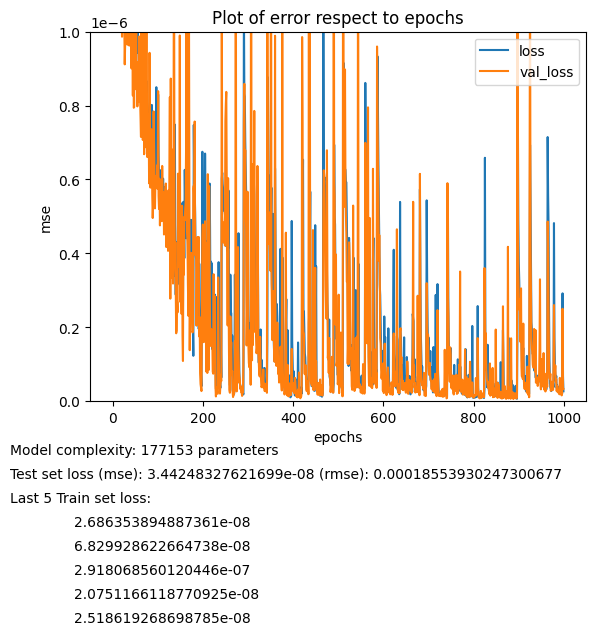

In [33]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
plt.ylim([0, 1e-6])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In [41]:
emp_test = np.array([-2.9219,3.009,4.4996,45])
emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [42]:
model.predict(emp_test)

1/1 [==============================] - 0s 20ms/step


array([[37.710503]], dtype=float32)

# Scatter plot

In [21]:
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [22]:
pred = predictions(X_test)

In [23]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

3.442481823058672e-08

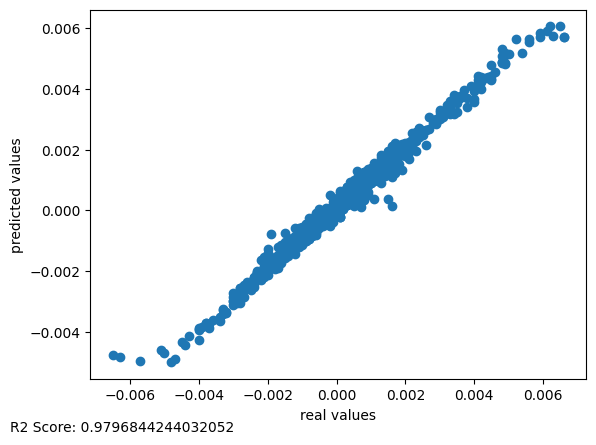

In [24]:
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()

# Saving model